<a href="https://colab.research.google.com/github/hbaniowda/Prediction-of-Product-Sales/blob/main/Assignment_Project_4_Part_1_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

When choosing your dataset, consider the following:


1- What is the target? (You are required to complete a classification task for this project)

2- What does one row represent? (A person? A business? An event? A product?)

3- How many features does the data have?

4- How many rows are in the dataset?

5- What opportunities exist for dimensionality reduction or feature selection with this dataset?

6- What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)
# Import the necessary function
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',100)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import os,sys
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Check for null values
df.isna().sum().sum()

0

In [ ]:
# Checking the unique dtypes
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Define X and y
y = df["income"].copy()
X = df.drop(columns=["income"]).copy()

# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=321)

In [ ]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Numerical Preprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

OneHotEncoder Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')
Numeric Columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [ ]:
# Check the balance of the target
y.value_counts(1)

,proportion
income,
<=50K,0.760718
>50K,0.239282


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_sm,y_train_sm = smote.fit_resample(X_train_transformed, y_train)
y_train_sm.value_counts()

,count
income,
<=50K,27849
>50K,27849


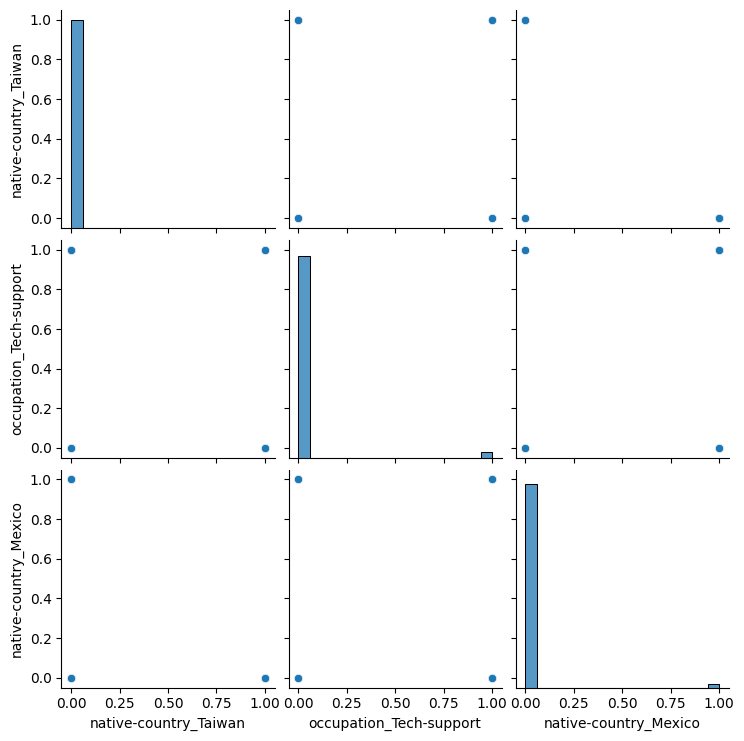

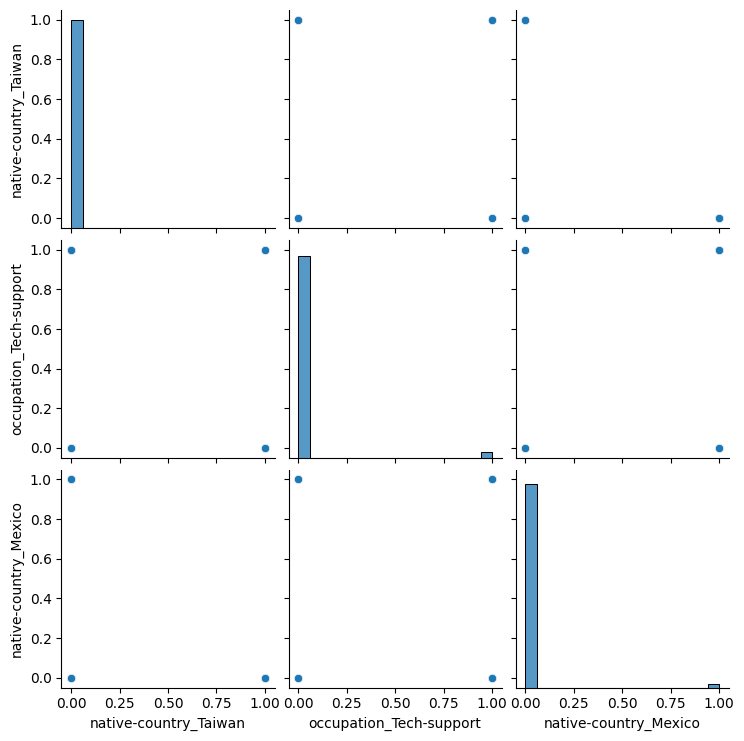

In [ ]:
# randomly select features to plot
np.random.seed(42)
random_features = np.random.choice(X_train_transformed.columns,3)
# plot thee randomly selected features
sns.pairplot(X_train_transformed,  vars=random_features);
sns.pairplot(pd.DataFrame(X_train_transformed), vars=random_features);

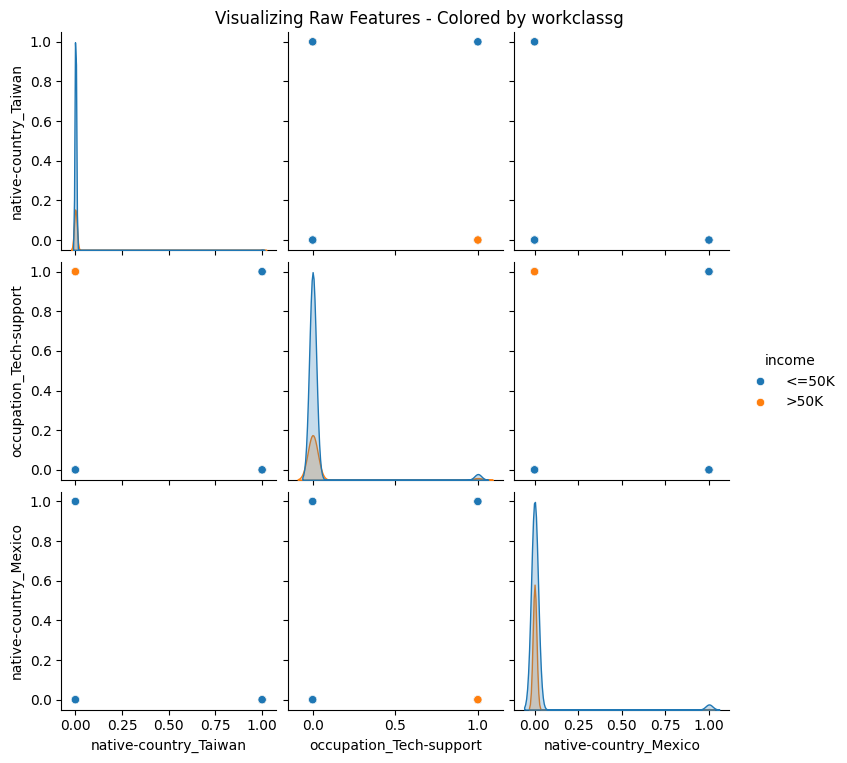

In [ ]:
# Concatenate scaled features with target
plot_df = pd.concat([X_train_transformed, y], axis=1)
# Plot with color coding based on target
g = sns.pairplot(data=plot_df,  vars=random_features, hue=y.name)
g.fig.suptitle('Visualizing Raw Features - Colored by workclassg', y=1.01);

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your training target variable and transform it
y_train_encoded = le.fit_transform(y_train)
# Transform the test target variable using the same encoder
y_test_encoded = le.transform(y_test)


In [ ]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_transformed,y_train_encoded)
# For predictions, you'll need to inverse_transform to get original labels
y_pred_encoded = reg.predict(X_test_transformed)
y_pred = le.inverse_transform(y_pred_encoded.astype(int))
evaluate_regression(reg, X_train_transformed, y_train_encoded, X_test_transformed, y_test_encoded)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.069
- MSE = 0.014
- RMSE = 0.119
- R^2 = 0.922

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.184
- MSE = 0.098
- RMSE = 0.313
- R^2 = 0.459


In [ ]:
# Obtain feature importances from the fit model
reg.feature_importances_

array([1.10975326e-01, 1.77664974e-01, 1.10566366e-01, 1.04546497e-01,
       3.96001472e-02, 6.42219083e-02, 1.43511344e-03, 5.01795372e-03,
       6.11647350e-03, 0.00000000e+00, 9.35550299e-03, 5.66111880e-03,
       8.39058746e-03, 4.52770978e-03, 7.39903885e-05, 5.80450895e-04,
       7.05360165e-04, 5.72074681e-04, 7.38788543e-05, 2.41734240e-04,
       3.94931023e-04, 4.68997494e-04, 1.45960531e-03, 2.30169559e-03,
       2.43532047e-03, 7.56923680e-04, 2.46967671e-03, 1.95180744e-03,
       3.11181458e-06, 1.05398315e-03, 2.82547917e-03, 2.05146416e-03,
       1.15349430e-04, 1.99518353e-01, 8.54626205e-04, 1.90280346e-03,
       9.71845062e-04, 1.11925376e-03, 1.35702758e-03, 5.59675784e-03,
       8.67523869e-05, 8.07519628e-03, 1.06910333e-02, 3.85910005e-03,
       3.10533466e-03, 5.28691680e-03, 4.02686280e-03, 3.47103792e-05,
       7.79402300e-03, 3.71487646e-03, 8.35852282e-03, 4.98964149e-03,
       5.65243996e-03, 2.47690947e-03, 1.97021817e-03, 9.84015988e-04,
      

In [ ]:
# Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_transformed.columns))
len(reg.feature_importances_) == len(X_train_transformed.columns)

108
108


True

In [ ]:
# Saving the feature importances
feature_names = X_train_transformed.columns  # Extract feature names from your DataFrame
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances

,Feature Importance
age,0.110975
fnlwgt,0.177665
educational-num,0.110566
capital-gain,0.104546
capital-loss,0.039600
...,...
native-country_Thailand,0.000048
native-country_Trinadad&Tobago,0.000048
native-country_United-States,0.004915
native-country_Vietnam,0.000185


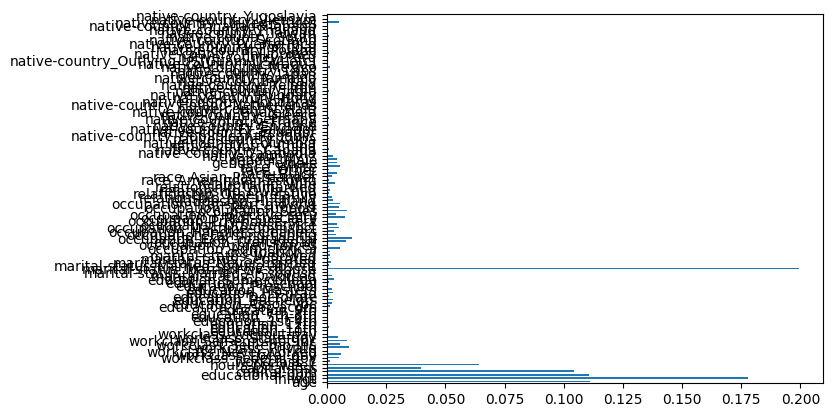

In [ ]:
# plot importance
ax = importances.plot(kind='barh')

In [ ]:
# Saving the feature importances sorted from largest to smallest (ascending=False)
sorted_importance = importances.sort_values(ascending=False)
sorted_importance

,Feature Importance
marital-status_Married-civ-spouse,0.199518
fnlwgt,0.177665
age,0.110975
educational-num,0.110566
capital-gain,0.104546
...,...
native-country_Honduras,0.000032
native-country_Outlying-US(Guam-USVI-etc),0.000019
education_Preschool,0.000003
native-country_Holand-Netherlands,0.000000


<Axes: >

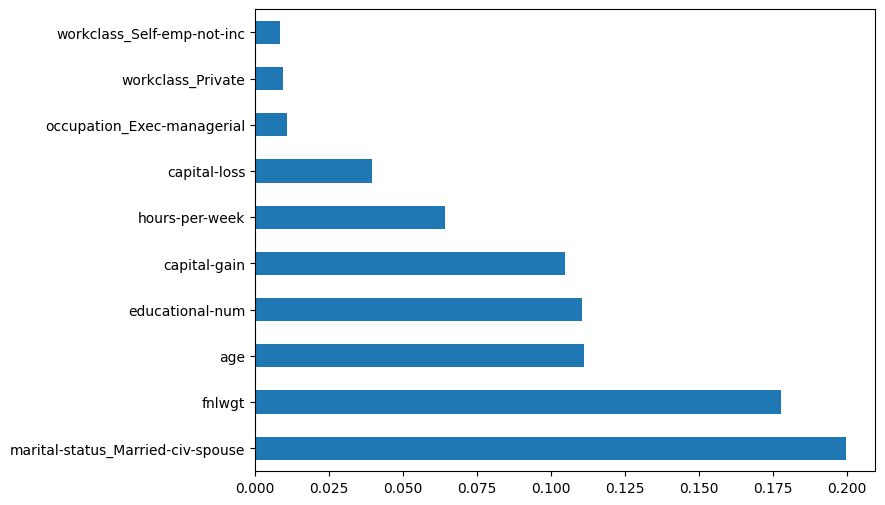

In [ ]:
# just keep the top 10 importances and plot
sorted_importance.head(10).plot(kind='barh',
                                   figsize=(8,6))

<Axes: xlabel='marital-status', ylabel='income'>

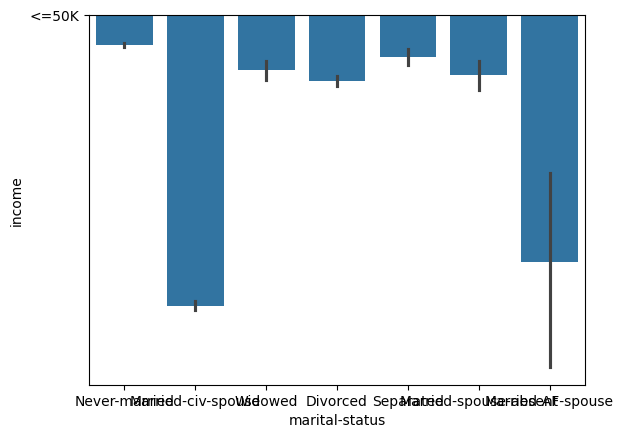

In [ ]:
#Plot a fig for the ,marital_status vs income
sns.barplot(x='marital-status', y='income', data=df)

<Axes: xlabel='fnlwgt', ylabel='income'>

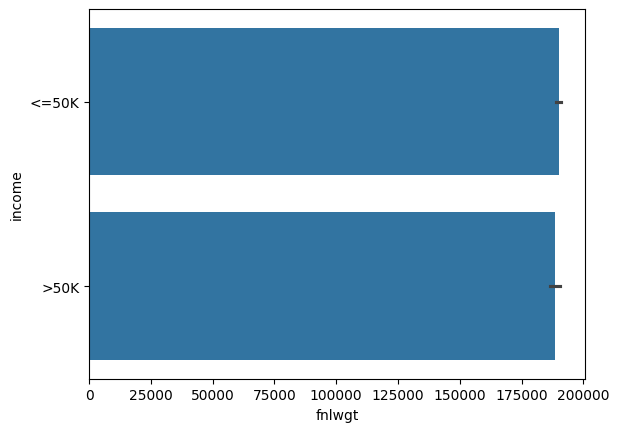

In [ ]:
#Plot a fig for the ,fnlwgt vs income
sns.barplot(x='fnlwgt', y='income', data=df)

<Axes: xlabel='occupation', ylabel='income'>

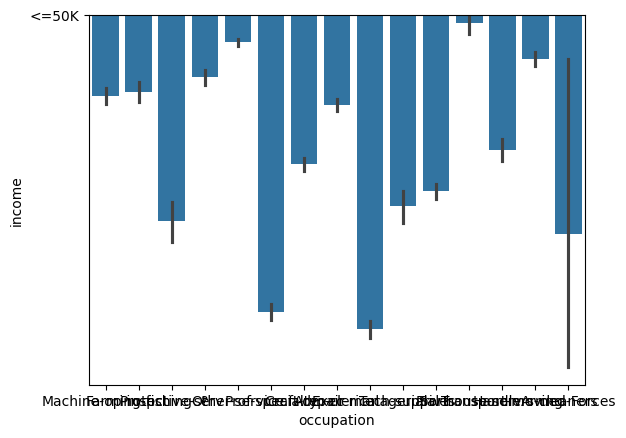

In [ ]:
#Plot a fig for the ,occupation vs income
sns.barplot(x='occupation', y='income', data=df)